In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [ ]:
zillow = pd.read_parquet('data/zillow.parquet')
zillow_zori = pd.read_parquet('data/zillow_zori.parquet')
state_names = pd.read_parquet('data/state_names.parquet')
fips = pd.read_parquet('data/fips.parquet')
equifax = pd.read_parquet('data/equifax.parquet')  
sld = pd.read_parquet('data/Smart_Location_Database.parquet')
food_atlas = pd.read_parquet('data/food_atlas.parquet')


In [ ]:
desert_conditions = (
    ((food_atlas.Urban == 1) & 
    (food_atlas.PovertyRate >= 20) & 
    ((food_atlas.LATracts1 == 1) | (food_atlas.LATracts_half == 1))) |

    ((food_atlas.Urban == 0) & 
    (food_atlas.PovertyRate >= 20) & 
    ((food_atlas.LATracts10 == 1) | (food_atlas.LATracts1 == 1) | (food_atlas.LATracts_half == 1))))

# Create the binary column
food_atlas['Desert'] = desert_conditions.astype(int)


food_atlas['HUNoVehicleShare'] = food_atlas['TractHUNV'] / food_atlas['OHU2010']


In [ ]:
zori_sorted = zillow_zori.sort_values(by=['FIPS','Y','M'])
zori_sorted = zori_sorted.dropna(axis=0)
zori_latest = zori_sorted.groupby('FIPS').last().reset_index()

In [ ]:
df_3 = food_atlas.copy()
df_3['FIPS'] = df_3['CensusTract'].str[:5]

df_3 = df_3.merge(zori_latest[['FIPS','Home Value']], on='FIPS', how='left').dropna(axis=0)

In [ ]:
food_desert_df = food_atlas[(((food_atlas.Urban == 1) & (food_atlas.PovertyRate >= 20) & (food_atlas.LATracts1 == 1)) |
                            ((food_atlas.Urban == 0) & (food_atlas.PovertyRate >= 20) & (food_atlas.LATracts10 == 1))) &
                            (food_atlas.GroupQuartersFlag == 0)]

food_desert_df['HUNoVehicleShare'] = food_desert_df['TractHUNV'] / food_desert_df['OHU2010']

/tmp/ipykernel_779/1308007485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_desert_df['HUNoVehicleShare'] = food_desert_df['TractHUNV'] / food_desert_df['OHU2010']


In [ ]:
features = ['PovertyRate','HUNoVehicleShare', 'lapophalfshare', 'lalowihalfshare',
           'lahunvhalfshare', 'lasnaphalfshare', 'lapop1share', 'lalowi1share',
           'lahunv1share', 'lasnap1share']



In [ ]:
df = food_desert_df[['CensusTract']+features]
df['FIPS'] = df['CensusTract'].str[:5]

/tmp/ipykernel_779/1165008390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FIPS'] = df['CensusTract'].str[:5]


In [ ]:
df_2 = df.merge(zori_latest[['FIPS','Home Value']], on='FIPS', how='left').dropna(axis=0)

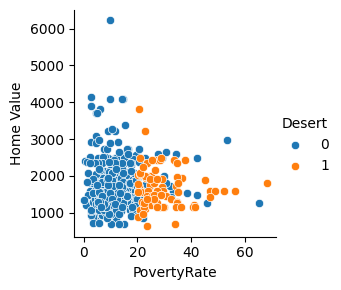

In [ ]:
g = sns.FacetGrid(df_3,  hue="Desert")
g.map_dataframe(sns.scatterplot, x="PovertyRate", y="Home Value")
g.add_legend()

In [ ]:
alt.Chart(df_2).mark_circle().encode(
    alt.X("PovertyRate", type='quantitative'),
    alt.Y("Home Value", type='quantitative'),
).properties(
    width=150,
    height=150
)

alt.Chart(...)

In [ ]:
charts = [alt.Chart(df_2).mark_boxplot().encode(
    x= alt.X(i, type = 'quantitative')
) for i in ['PovertyRate','Home Value']]

alt.vconcat(*charts)

alt.VConcatChart(...)

In [ ]:
alt.Chart(df[features]).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
).properties(
    width=150,
    height=150
).repeat(
    row= features,
    column= features[::-1]
)

alt.RepeatChart(...)

In [ ]:
charts = [alt.Chart(df).mark_boxplot().encode(
    x= alt.X(i)
) for i in features]

alt.vconcat(*charts)

alt.VConcatChart(...)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e75edf0e-32f1-42b8-8a27-9dc0078a206d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>